# IV SHIFT

Code for experimental data processing - shifting/centering of the data and obtaining values for critical points.  

__Input data:__ file with experimental numerical data in tabular form  (I-V _current vs voltage_ characteristics of superconducting nanowires).  

__Workflow:__
1. Input from txt file.
2. Rescaling and centering of I-V curve relatively to the (0.0) coordinates.
3. Obtaining values of some critical points.
3. Transformation I-V to R-I (resistance vs current).
4. Saving processed data in tabular form.

__Output data:__ file with processed data in tabular form

In [2]:
import matplotlib.pyplot as plt

In [64]:
def selectData(minVal, maxVal, dataForCheck, dataForSelect):
    """
    Function selects elements from dataForSelect list (argument #4),
    with index corresponding to the index of dataForCheck elements
    (argument #3), that meet condition minVal < dataForCheck[i] < maxVal.
    Then it returns new list with part of elements from dataForSelect.
    """
    tempListSel = []
    tempListChk = []
    for i in range(len(dataForCheck)):
        if dataForCheck[i] > minVal and dataForCheck[i] < maxVal:
            tempListSel.append(dataForSelect[i])
            tempListChk.append(dataForCheck[i])
    return tempListSel


def shiftData(selectedData, dataForShift):
    """
    Function finds middle point of selected part of selectedData
    (argument #1), then calculates shift value for shifting of 
    dataForShift (argumnent #2) to the center point at (0.0) position.
    Then it returns new list of shifted data.
    """
    tempList = []
    shift = zeroPosition - (max(selectedData) + min(selectedData))/2
    for i in range(len(dataForShift)):
        tempList.append(dataForShift[i]+shift)
    return tempList


def readData(filename, rescaleX, rescaleY):
    """
    Function reads experimental data file and selects voltage and current
    data, and rescale it.
    Input file contains 4 columns: time | voltage | time | current
    """
    rawdata = []
    with open(filename+".txt", "r") as f:
        rawdata = [float(i) for i in f.read().split()]
    voltage = list(map(lambda x: x*rescaleX, rawdata[1::4]))
    current = list(map(lambda x: x*rescaleY, rawdata[3::4]))
    return voltage, current


def saveData(filename, voltage, current, resist):
    output = zip(voltage, current, current, resist)
    with open(filename+"-shifted.txt", 'w') as f:
        f.write("Voltage Current Current Resistance\n")
        for item in output:
            f.write("%s %s %s %s\n" % item)


def selectRetrap(minVal, maxVal, voltage, current):
    """
    Function selects part of input data lists (arguments #3 and #4),
    with index corresponding to the index of first data list "Voltage"
    (argument #3) that meet condition minVal < Voltage[i] < maxVal.
    Then it returns two new lists with selected data.
    """
    v = []
    c = []
    for i in range(len(voltage)):
        if voltage[i] > minX and voltage[i] < maxX:
            v.append(voltage[i])
            c.append(current[i])
    return v, c

def figplot(n, axisX, axisY, label, labelX = "X axis", labelY = "y axis", style = '-'):
    plt.figure(n)
    plt.plot(axisX, axisY, style, label = label)
    plt.legend()
    plt.xlabel(labelX)
    plt.ylabel(labelY)

In [65]:
zeroPosition = 0


shift_current = []
shift_voltage = []

rescaleVoltage = 1 / 100        # V1/100 - remove x100 amplification
rescaleCurrent = 1 / 100 / 100  # remove x100 amplification, current=V2/100 Ohm

### Read I-V data

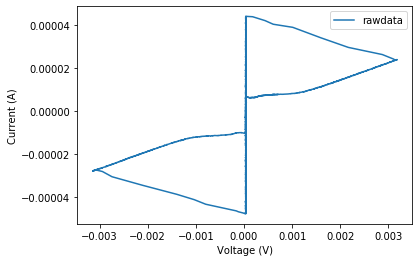

In [73]:
filename = "iv1"
voltage = []
current = []
voltage, current = readData(filename, rescaleVoltage, rescaleCurrent)  #divide to voltage and current lists

figplot(0, voltage, current, "rawdata", "Voltage (V)", "Current (A)")

### Shift along Y (current) axis

- Select central part of I-V to find max/min Y values
- Side parts of I-V can be higher than central part, so they needs to be excluded.
- Calculate shift step for centering relative X=0. 
- Move all data by Y-axis by shift step.
- Find max/min => I<sub>switching</sub>


Rawdata:
minY = -4.77e-05 
maxY = 4.40e-05 
Switching current = 4.58e-05

After Yshift:
minY = -4.58e-05 
maxY = 4.58e-05 
Switching current = 4.58e-05


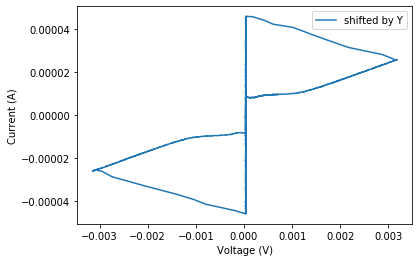

In [67]:
minX = -1e-4
maxX = 1e-4

tempList = []
tempList = selectData(minX, maxX, voltage, current)  # Select Current(Y) data using Voltage(X) limits.

shift_current = shiftData(tempList, current)  # Shift along Y axis to symmetrical position.

isw = (abs(max(tempList)) + abs(min(tempList))) / 2  # Calculate switching current (max current for zero voltage state)

print("\nRawdata:\nminY =", "{:2.2e}".format(min(current)), "\nmaxY =", "{:2.2e}".format(max(current)),
      "\nSwitching current =", "{:2.2e}".format(isw))
print("\nAfter Yshift:\nminY =", "{:2.2e}".format(min(shift_current)), "\nmaxY =", 
      "{:2.2e}".format(max(shift_current)), "\nSwitching current =", "{:2.2e}".format(isw))
figplot(0, voltage, shift_current, "shifted by Y", "Voltage (V)", "Current (A)")

### Shift along X axis 
- X-shift is based on position of central vertical I-V line.
- Select small part of data around zero, with +Y and -Y close to zero.
- Find min/max X values
- Calculate shift step for centering relative Y=0.
- Move all data by X-axis by shift step.


Before shift:
minX= 2.92e-05 
maxX= 4.77e-05


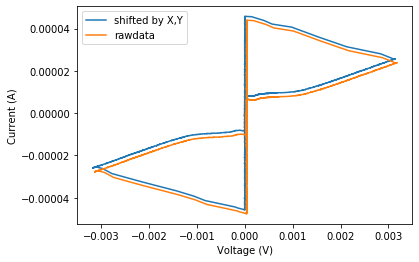

In [68]:
minY = -3e-6
maxY = 3e-6

tempList = []
tempList = selectData(minY, maxY, shift_current, voltage)  # Select Voltage(X) data using Current(Y) limits.

shift_voltage = shiftData(tempList, voltage)  # Shift of X data

print("\nBefore shift:\nminX=", "{:2.2e}".format(min(tempList)), "\nmaxX=", "{:2.2e}".format(max(tempList)))
figplot(0, shift_voltage, shift_current, "shifted by X,Y", "Voltage, (V)", "Current (A)")  # Final shifted graph
figplot(0, voltage, current, "rawdata", "Voltage (V)", "Current (A)")  #init data for comparison

### Resistance-Current representation

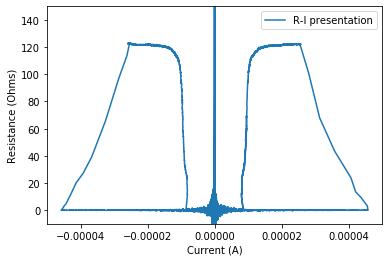

In [69]:
resist = []
for j in range(len(voltage)):
    resist.append((shift_voltage[j])/(shift_current[j]))

figplot(1, shift_current, resist, "R-I presentation", "Current (A)", "Resistance (Ohms)")
plt.axis([-0.00005, 0.00005, -10, 150]);  #change graph range

### Retrapping current findings
- Select middle part around zero to find Xmin Xmax for shifted data
- Select data that falls into a narrow area on the left and right next to the center line.
- Find min(Y) for "+" branch and max(Y) for "-" branch

In [70]:
tempList = []
tempList = selectData(minY, maxY, shift_current, shift_voltage)

#### "+" Branch

minX= 5.92e-05 	maxX= 4.00e-04
+Ir=: 8.00e-06


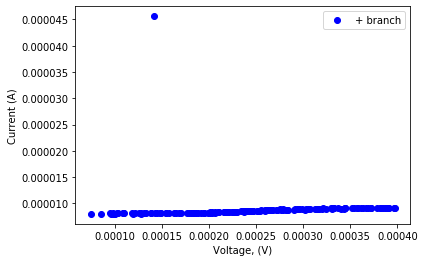

In [71]:
minX = max(tempList)+5e-5
maxX = 4e-4
print("minX=", "{:2.2e}".format(minX), "\tmaxX=", "{:2.2e}".format(maxX))
v = []
c = []
v, c = selectRetrap(minX, maxX, shift_voltage, shift_current)
retrapCurrentP = min(c)

figplot(2, v, c, "+ branch", "Voltage, (V)", "Current (A)", 'bo')
print("+Ir=:", "{:2.2e}".format(retrapCurrentP))

#### "-" Branch

minX= -4.00e-04 	maxX= -5.92e-05
-Ir=: -8.11e-06


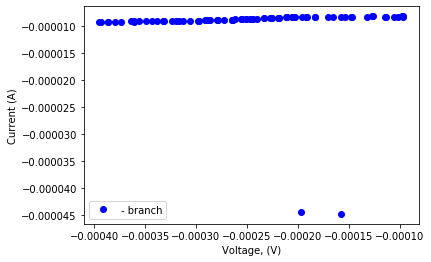

In [72]:
minX = -4e-4
maxX = min(tempList)-5e-5
print("minX=", "{:2.2e}".format(minX), "\tmaxX=", "{:2.2e}".format(maxX))
v = []
c = []
v, c = selectRetrap(minX, maxX, shift_voltage, shift_current)
retrapCurrentN = max(c)

figplot(3, v, c, "- branch", "Voltage, (V)", "Current (A)", 'bo')
print("-Ir=:", "{:2.2e}".format(retrapCurrentN))

#### Retrapping current I<sub>r</sub> value

In [61]:
retrap = (abs(retrapCurrentP) + abs(retrapCurrentN)) / 2
print("\nmean Ir=", "{:2.2e}".format(retrap))


mean Ir= 8.05e-06


In [ ]:
saveData(filename, shift_voltage, shift_current, resist)